In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

KeyboardInterrupt: ignored

In [0]:
%cd 'drive/My Drive/Plotting_EMNLP'

/content/drive/My Drive/Plotting_EMNLP


In [0]:
import numpy as np
import sklearn
from btp2_updated_new_same_lang import return_test_sets, return_gender_pairs, cosine1, var, top_k, top_k_PPA
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.utils.extmath import svd_flip
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.font_manager import FontProperties
# from mpl_toolkits.mplot3d import Axes3D
from projpursuit import projpursuit
import seaborn as sns
import pandas as pd
# import plotly
# import plotly.graph_objs as go
# plotly.offline.init_notebook_mode()
from scipy import spatial

np.random.seed(42)
hindi_font = FontProperties(fname = 'Nirmala.ttf')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
debiased_embeddings = np.load('debiased_embeddings_4.npy', allow_pickle=True).item()
NE, NH, NB, NT, N = return_test_sets()
axis_en, axis_hi, axis_be, axis_te, axis_all, e_plusH, e_minusH, e_plusE, e_minusE, e_plusB, e_minusB, e_plusT, e_minusT, e_plus, e_minus,G_hi,G_be,G_en,G_te, en_pairs_train, hi_pairs_train, be_pairs_train, te_pairs_train = return_gender_pairs()
hi_pairs_test = [['भाई', 'बहन'], ['भैया', 'भाभी'], ['देवर', 'देवरानी'], ['देव', 'देवी'], ['पुत्र', 'पुत्री'], ['श्रीमान', 'श्रीमति'], ['बालक', 'बालिका'], ['भतीजा', 'भतीजी'], ['नाना', 'नानी'], ['साधु', 'साध्वी']]    
en_pairs_test = [['boys', 'girls'], ['brothers', 'sisters'], ['kings', 'queens'], ['men', 'women'], ['gal', 'guy'], ['husband', 'wife'], ['father', 'mother'], ['god', 'goddess'], ['father-in-law', 'mother-in-law'], ['son-in-law', 'daughter-in-law']]
be_pairs_test = [['দেব', 'দেবী'], ['পুত্র', 'কন্যা'], ['শ্রীমান', 'শ্রীমতি'], ['ভাইপো', 'ভাইঝি'], ['বোনপো', 'বোনঝি'], ['ঠাকুরদা', 'ঠাকুমা'], ['সন্ন্যাসী', 'সন্ন্যাসিনী'], ['কাকা', 'কাকী'], ['দেওর', 'জা'], ['নন্দাই', 'ননদ'], ['শালা', 'শালী']]
te_pairs_test = [['కొడుకు', 'కుమార్తె'], ['మిస్టర్', 'శ్రీమతి'], ['అబ్బాయి', 'అమ్మాయి'], ['మేనల్లుడు', 'మేనకోడలు'], ['ఎద్దు', 'ఆవు']]

### Common space preservation

In [0]:
NE_TO_NH_trans = [
"प्रोफेसर",
"व्यवस्थापक",
"दूत",
"वास्तुकार",
"कलाकार",
"डीन",
"खिलाड़ी",
"निदेशक",
"लेखक",
"बेकर, नानबाई",
"मालिक",
"चालक",
"कप्तान",
"चांसलर",
"क्लर्क",
"कोच",
"एकत्र करनेवाला",
"कमांडर",
"आयुक्त",
"संगीतकार",
"कंडक्टर",
"सलाहकार",
"पुलिस",
"आलोचक",
"उप",
"चिकित्सक",
"छात्र",
"संपादक",
"किसान",
"पायलट",
"लेखक",
"डिजाइनर",
"गिटारवादक",
"इतिहासकार",
"पत्रकार",
"न्यायाधीश",
"लेफ्टिनेंट",
"प्रबंधक",
"गणितज्ञ",
"मंत्री",
"संगीतकार",
"उपन्यासकार",
"अधिकारी",
"दार्शनिक",
"कवि",
"राजनेता",
"अध्यक्ष",
"प्रधान अध्यापक",
"संत",
"विद्वान",
"वैज्ञानिक",
"सचिव",
"गायक",
"गीतकार",
"फोजी",
"प्रबंधक",
"विकल्प",
"अध्यापक",
"योद्धा",
'निष्पक्ष',
"अच्छा",
"रोशनी",
"बेचैन",
"धनी",
"आधुनिक",
"सादे",
"जरूरी",
"विशेष",
"शक्तिशाली",
"उज्ज्वल",
"बुराई",
"चेतावनी",
"चिंतित",
'असामान्य',
"अजीब",
"नया",
"थोड़ा",
"कम",
"बड़े",
"उच्च",
"मुश्किल",
"आसान",
"मेहरबान",
"प्रसिद्ध",
'दोस्ताना',
"मददगार",
"सावधान",
"अच्छा",
"उत्तम",
"बेहतर",
"युवा",
"खुश",
'डार्क',
"औसत",
"उत्तम",
"मुश्किल",
"छोटे",
"जंगली",
"गरीब",
"उलझन",
"मोटी",
"पतली",
"लंबा",
"स्वच्छ",
"बलवान",
"विशाल",
"खराब",
"अजीब",
"पुराना"]

NE_TO_NT_trans = [
    
"ప్రొఫెసర్",
"నిర్వాహకుడు",
"రాయబారి",
"వాస్తుశిల్పి",
"కళాకారుడు",
"డీన్",
"అథ్లెట్",
"దర్శకుడు",
"రచయిత",
"బేకర్",
"బాస్",
"డ్రైవర్",
"కెప్టెన్",
"ఛాన్సలర్",
"గుమస్తా",
"రైలు పెట్టె",
"కలెక్టర్",
"కమాండర్",
"కమిషనర్",
"స్వరకర్త",
"సూత్రధారి",
"కన్సల్టెంట్",
"పోలీసు",
"విమర్శకుడు",
"డిప్యూటీ",
"వైద్యుడు",
"విద్యార్థి",
"ఎడిటర్",
"వ్యవసాయదారుడు"
"పైలట్",
"రచయిత",
"డిజైనర్",
"గిటారిస్ట్",
"చరిత్రకారుడైన",
"విలేఖరి",
"న్యాయమూర్తి",
"లెఫ్టినెంట్",
"నిర్వాహకుడు",
"గణిత శాస్త్రజ్ఞుడు",
"మంత్రి",
"సంగీతకారుడు",
"నవలా రచయిత",
"అధికారి",
"తత్వవేత్త",
"కవి",
"రాజకీయ",
"అధ్యక్షుడు",
"సూత్రం",
"సెయింట్",
"విద్వాంసుడు",
"శాస్త్రవేత్త",
"కార్యదర్శి",
"గాయకుడు",
"పాటల రచయిత",
"సైనికుడు",
"స్టీవార్డ్",
"సబ్స్టిట్యూట్",
"గురువు",
"వారియర్",
"ఫెయిర్"
"మంచిది",
"కాంతి",
"నరాల",
"రిచ్",
"ఆధునిక",
"సాదా",
"ముఖ్యమైన",
"ప్రత్యేక",
"శక్తివంతమైన",
"ప్రకాశవంతమైన",
"చెడు",
"హెచ్చరిక",
"సంబంధిత",
"అసాధారణ",
"బేసి",
"కొత్త",
"చిన్న",
"తక్కువ",
"పెద్ద",
"అధిక",
"కష్టం",
"సులభంగా",
"రకం",
"ప్రసిద్ధ",
"స్నేహపూరిత",
"ఉపయోగపడిందా",
"జాగ్రత్తగా",
"బాగుంది",
"ఖచ్చితమైన",
"మంచి",
"యువ",
"సంతోషంగా",
"కృష్ణ",
"సగటు",
"సూపర్",
"గట్టి",
"చిన్న",
"అడవి",
"పేద",
"గందరగోళం",
"కొవ్వు",
"పలుచటి",
"పొడవు",
"శుభ్రం",
"బలమైన",
"పెద్ద",
"చెడ్డ",
"వింత",
"పాత"
]

NE_TO_NB_trans = [
    
"অধ্যাপক",
"প্রশাসক",
"রাষ্ট্রদূত",
"স্থপতি",
"শিল্পী",
"যাজক",
"ক্রীড়াবিদ",
"পরিচালক",
"লেখক",
"রুটিওয়ালা",
"মনিব",
"ড্রাইভার",
"অধিনায়ক",
"চ্যান্সেলর",
"কেরানি",
"কোচ",
"সংগ্রাহক",
"সেনাপতি",
"কমিশনার",
"সুরকার",
"কন্ডাকটর",
"পরামর্শক",
"পুলিশ",
"সমালোচক",
"সহকারী",
"ডাক্তার",
"ছাত্র",
"সম্পাদক",
"কৃষক",
"বিমান - চালক",
"লেখক",
"নকশাকার",
"গিটার",
"ঐতিহাসিক",
"সাংবাদিক",
"বিচারক",
"প্রতিনিধি",
"ম্যানেজার",
"গণিতজ্ঞ",
"মন্ত্রী",
"সুরকার",
"ঔপন্যাসিক",
"অফিসার",
"দার্শনিক",
"কবি",
"রাজনীতিবিদ",
"রাষ্ট্রপতির",
"অধ্যক্ষ",
"সেন্ট",
"পণ্ডিত",
"বিজ্ঞানী",
"সচিব",
"গায়ক",
"গীতিকার",
"সৈনিক",
"গোমস্তা",
"বিকল্প",
"শিক্ষক",
"যোদ্ধা",
"ন্যায্য",
"ভাল",
"আলো",
"স্নায়বিক",
"সমৃদ্ধ",
"আধুনিক",
"প্লেইন",
"গুরুত্বপূর্ণ",
"বিশেষ",
"ক্ষমতাশালী",
"উজ্জ্বল",
"মন্দ",
"সতর্কতা",
"উদ্বিগ্ন",
"অস্বাভাবিক",
"অস্বাভাবিক",
"নতুন",
"সামান্য",
"কম",
"বৃহৎ",
"উচ্চ",
"কঠিন",
"সহজ",
"দয়ালু ",
"বিখ্যাত",
"বন্ধুত্বপূর্ণ",
"সহায়ক",
"সাবধান",
"চমৎকার",
"নিখুঁত",
"উত্তম",
"ইয়াং",
"খুশি",
"অন্ধকার",
"গড়",
"সুপার",
"কঠিন",
"ছোট",
"বন্য",
"খারাপ",
"বিভ্রান্ত",
"চর্বি",
"পাতলা",
"লম্বা",
"পরিষ্কার",
"শক্তিশালী",
"বড়",
"খারাপ",
"অস্বাভাবিক",
'পুরানো'
]

In [0]:
NE_TO_NH_trans_in_vocab = {}
for i,j in zip(NE_TO_NH_trans, NE):
    if i in debiased_embeddings['Orig']:
        NE_TO_NH_trans_in_vocab[j] = i

NE_TO_NB_trans_in_vocab = {}
for i, j in zip(NE_TO_NB_trans, NE):
    if i in debiased_embeddings['Orig']:
        NE_TO_NB_trans_in_vocab[j]=i
        
# NE_TO_NT_trans_in_vocab = {}
# for i,j in zip(NE_TO_NT_trans, NE):
#     if i in debiased_embeddings['Orig']:
#         NE_TO_NT_trans_in_vocab[j] = i

NE_TO_NT_trans_in_vocab = {}
for i in [['ambassador', 'రాయబారి'],
['artist', 'కళాకారుడు'],
['author', 'రచయిత'],
['commissioner', 'కమిషనర్'],
['consultant', 'కన్సల్టెంట్'],
['critic', 'విమర్శకుడు'],
['student', 'విద్యార్థి'],
['editor', 'ఎడిటర్'],
#['pilot', 'పైలట్'],
#['journalist', 'జర్నలిస్ట్'],
#['lieutenant', 'లెఫ్టినెంట్'],
['minister', 'మంత్రి'],
#['poet', 'కవి'],
#['principal', 'ప్రధాన'],
#['scientist', 'శాస్త్రవేత్త'],
#['fair', 'సరసమైన'],
#['new', 'క్రొత్తది'],
#['big', 'పెద్దది']
         ]:
    NE_TO_NT_trans_in_vocab[i[0]]=i[1]

In [0]:
def cal_sim(u1, v1, u2, v2, use_spacey=True):
    # both spacey and np give same res
    u1/=np.linalg.norm(u1)
    u2/=np.linalg.norm(u2)
    v1/=np.linalg.norm(v1)
    v2/=np.linalg.norm(v2)
    if use_spacey:
        after_debiasing = 1-spatial.distance.cosine(u1, v1)
        before_debiasing = 1-spatial.distance.cosine(u2, v2)
    else:
        after_debiasing = np.dot(u1, v1)/(np.linalg.norm(u1)*np.linalg.norm(v1))
        before_debiasing = np.dot(u2, v2)/(np.linalg.norm(u2)*np.linalg.norm(v2))
    return before_debiasing, after_debiasing

def is_improving(before_debiasing, after_debiasing):
    return before_debiasing<after_debiasing

def is_improving_int(before_debiasing, after_debiasing):
    if before_debiasing<after_debiasing:
        return 1
    return -1

EMBD = [['hi_HD', 'bn_HD', 'te_HD'], 
        ['hi_HD_PPA', 'bn_HD_PPA', 'te_HD_PPA'], 
        ['g_hi_PCA', 'g_bn_PCA', 'g_te_PCA'], 
        ['g_hi_PPA', 'g_bn_PPA', 'g_te_PPA'],
        ['all_PCA', 'all_PCA', 'all_PCA'],
        ['all_PPA', 'all_PPA', 'all_PPA'],
        ['equal_rep_PCA', 'equal_rep_PCA', 'equal_rep_PCA'],
        ['equal_rep_PPA', 'equal_rep_PPA', 'equal_rep_PPA']
       ]

for embd_ in EMBD:
    for NE_TO_N_trans_in_vocab, lang, embd_trans in zip([NE_TO_NH_trans_in_vocab, NE_TO_NB_trans_in_vocab, NE_TO_NT_trans_in_vocab], ['hi', 'be', 'te'], embd_):
        cos_sim_diff = []    
        print(lang, embd_trans, end=' ')
        for i in NE_TO_N_trans_in_vocab:
            before_debiasing, after_debiasing = cal_sim(debiased_embeddings[embd_trans][i], 
                                                        debiased_embeddings[embd_trans][NE_TO_N_trans_in_vocab[i]],
                                                        debiased_embeddings['Orig'][i], 
                                                        debiased_embeddings['Orig'][NE_TO_N_trans_in_vocab[i]])
            #cos_sim_diff.append(-is_improving_int(before_debiasing, after_debiasing)*abs(before_debiasing-after_debiasing))
            cos_sim_diff.append((before_debiasing-after_debiasing)/before_debiasing)

        cos_sim_diff  = np.array(cos_sim_diff)*100
        #cos_sim_diff = cos_sim_diff[np.where(abs(cos_sim_diff)<100)]
        print(sorted(cos_sim_diff, reverse=True))
        print(np.mean(cos_sim_diff))
    print('\n')

hi hi_HD [15.43460781308554, 5.885318093968875, 4.167690962156145, 4.020501856362512, 3.5369477037118955, 1.9381434812735676, 1.5697750067398364, 1.0593123944112863, 1.0592255712203285, 0.9368756708370025, 0.9015431967492339, 0.5666074462420715, 0.4773129640574238, 0.1945292560835584, 0.10792714842143138, 0.045354341873784204, 0.002791003152628914, -0.2027802574926737, -0.4516287421721929, -0.7634190294093736, -1.0319447961611554, -1.2255654836981267, -1.6800845220359615, -1.8872280386459983, -2.4227469179330154, -3.8928921477931553, -6.655815481257002, -7.362287563089698, -11.263014453294222, -22.215382971002338, -30.032904761362783, -49.40411954911258, -58.56529311031057, -89.59647688892059, -204.6909506336065, -1341.2757308058542]
-49.79766117341124
be bn_HD [36.59406995888001, 17.5369822458478, 17.13786816768003, 16.18308506731542, 10.976403320303909, 9.541717984673888, 8.501090997031387, 7.707511777336267, 6.142610080022281, 5.637191611759424, 4.747931808457355, 4.600008892093135,

be equal_rep_PPA: 



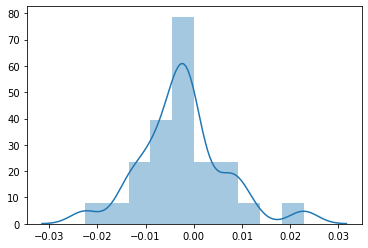

In [0]:
def cal_sim(u1, v1, u2, v2, use_spacey=True):
    # both spacey and np give same res
    u1/=np.linalg.norm(u1)
    u2/=np.linalg.norm(u2)
    v1/=np.linalg.norm(v1)
    v2/=np.linalg.norm(v2)
    if use_spacey:
        after_debiasing = 1-spatial.distance.cosine(u1, v1)
        before_debiasing = 1-spatial.distance.cosine(u2, v2)
    else:
        after_debiasing = np.dot(u1, v1)/(np.linalg.norm(u1)*np.linalg.norm(v1))
        before_debiasing = np.dot(u2, v2)/(np.linalg.norm(u2)*np.linalg.norm(v2))
    return before_debiasing, after_debiasing

def is_improving(before_debiasing, after_debiasing):
    return before_debiasing<after_debiasing

def is_improving_int(before_debiasing, after_debiasing):
    if before_debiasing<after_debiasing:
        return 1
    return -1

EMBD = [
        ['bn_HD'], 
        ['equal_rep_PCA'],
        ['equal_rep_PPA'],
        ['g_bn_PCA'], 
        ['g_bn_PPA'],
        ['all_PCA'],
        ['all_PPA']
       ][2:3]

for embd_ in EMBD:
    for NE_TO_N_trans_in_vocab, lang, embd_trans in zip([NE_TO_NB_trans_in_vocab, NE_TO_NT_trans_in_vocab, NE_TO_NH_trans_in_vocab], ['be', 'te', 'he'], embd_):
        cos_sim_diff = []    
        print(lang, embd_trans, end=': ')
        for i in NE_TO_N_trans_in_vocab:
            before_debiasing, after_debiasing = cal_sim(debiased_embeddings[embd_trans][i], 
                                                        debiased_embeddings[embd_trans][NE_TO_N_trans_in_vocab[i]],
                                                        debiased_embeddings['Orig'][i], 
                                                        debiased_embeddings['Orig'][NE_TO_N_trans_in_vocab[i]])
            cos_sim_diff.append(is_improving_int(before_debiasing, after_debiasing)*abs(before_debiasing-after_debiasing))
        cos_sim_diff  = np.array(cos_sim_diff)
        sns.distplot(cos_sim_diff)
        #print(np.mean(cos_sim_diff))
        #print(cos_sim_diff)
    print('\n')

In [0]:
EMBD = [['Orig', 'Orig', 'Orig', 'Orig'], 
        ['en_HD', 'hi_HD', 'bn_HD', 'te_HD'], 
        ['equal_rep_PCA', 'equal_rep_PCA', 'equal_rep_PCA', 'equal_rep_PCA'],
        ['equal_rep_PPA', 'equal_rep_PPA', 'equal_rep_PPA', 'equal_rep_PPA']]
for embd_ in EMBD:
    for NE_TO_N_trans_in_vocab, lang, embd_trans in zip([NE_TO_NH_trans_in_vocab, NE_TO_NB_trans_in_vocab, NE_TO_NT_trans_in_vocab], ['hi', 'be', 'te'], embd_[1:]):
        cos_sim = []    
        print(lang, embd_[0], embd_trans, end=': ')
        for i in NE_TO_N_trans_in_vocab:
            cos_sim.append(1-spatial.distance.cosine(debiased_embeddings[embd_[0]][i], debiased_embeddings[embd_trans][NE_TO_N_trans_in_vocab[i]]))
            pass
        print(np.mean([abs(i) for i in cos_sim]))

hi Orig Orig: 0.04402267083360685
be Orig Orig: 0.04354566736133249
te Orig Orig: 0.03847415822051863
hi en_HD hi_HD: 0.04362037347745809
be en_HD bn_HD: 0.04306003907010544
te en_HD te_HD: 0.04541182856714418
hi equal_rep_PCA equal_rep_PCA: 0.04778671026776184
be equal_rep_PCA equal_rep_PCA: 0.04456345728136803
te equal_rep_PCA equal_rep_PCA: 0.040365327059168364
hi equal_rep_PPA equal_rep_PPA: 0.04435302347696004
be equal_rep_PPA equal_rep_PPA: 0.04703221071358329
te equal_rep_PPA equal_rep_PPA: 0.036969927615963155


### Top 40 components

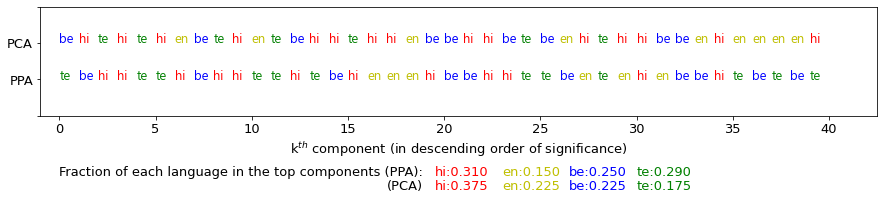

In [0]:
def label_point_color(x, y,val, ax, hue):
    a = pd.concat({'x': x, 'y': y, 'val': val, 'color':pd.Series(hue)}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'], point['y'], str(point['val']), fontproperties=hindi_font, fontsize=13, color=point['color'])


def plot_all_40_comp():
    
    PCA_all_tags= ['be', 'hi', 'te', 'hi', 'te', 'hi', 'en', 'be', 'te', 'hi', 'en', 'te', 'be', 'hi', 'hi', 'te', 'hi', 'hi', 'en', 'be', 'be', 'hi', 'hi', 'be', 'te', 'be', 'en', 'hi', 'te', 'hi', 'hi', 'be', 'be', 'en', 'hi', 'en', 'en', 'en', 'en', 'hi']
    PPA_all_tags=  ['te', 'be', 'hi', 'hi', 'te', 'te', 'hi', 'be', 'hi', 'hi', 'te', 'te', 'hi', 'te', 'be', 'hi', 'en', 'en', 'en', 'hi', 'be', 'be', 'hi', 'hi', 'te', 'te', 'be', 'en', 'te', 'en', 'hi', 'en', 'be', 'be', 'hi', 'te', 'be', 'te', 'be', 'te']

    hue_to_color = {'hi':'r', 'en':'y', 'be':'b', 'te':'g'}
    x = [i for i in range(len(PPA_all_tags))]+[i for i in range(len(PCA_all_tags))]
    y = [1]*len(PPA_all_tags) + [2]*len(PCA_all_tags)
    hue = [hue_to_color[i] for i in PPA_all_tags]+[hue_to_color[i] for i in PCA_all_tags]    

    with_text = True
    if with_text==True:
        plt.figure(figsize=(15,2))
        matplotlib.rcParams.update({'font.size': 13})
        ax = sns.scatterplot(x, y, color='w')    
        ax.set_yticks([0, 1, 2, 3])
        ax.set_yticklabels(['', 'PPA', 'PCA',''])
        plt.xlim([-1, 42.5])
        #ax.set_xticks([i for i in range(0, 45, 5)])
        #ax.set_xticklabels([i+1 for i in range(0, 45, 5)])
        ax.set(xlabel=r'k$^{th}$ component (in descending order of significance)')
        #ax.set_title('Top 40 PCA and PPA component’s language orientation')
        labels = PPA_all_tags + PCA_all_tags
        label_point_color(pd.Series(x), pd.Series(y), pd.Series(labels), ax, hue)  
        y_shift = -0.25
        ax.text(0, -1.4 + y_shift, 'Fraction of each language in the top components (PPA):')
        ax.text(17, -1.8+ y_shift, '(PCA)')
        ax.text(19+0.5, -1.8+ y_shift, 'hi:0.375', color='r')
        ax.text(22.5+0.5, -1.8+ y_shift, 'en:0.225', color='y')
        ax.text(26+0.5, -1.8+ y_shift, 'be:0.225', color='b')
        ax.text(29.5+0.5, -1.8+ y_shift, 'te:0.175', color='g')
        ax.text(19+0.5, -1.4+ y_shift, 'hi:0.310', color='r')
        ax.text(22.5+0.5, -1.4+ y_shift, 'en:0.150', color='y')
        ax.text(26+0.5, -1.4+ y_shift, 'be:0.250', color='b')
        ax.text(29.5+0.5, -1.4+ y_shift, 'te:0.290', color='g')

    else:
        plt.figure(figsize=(15,2))
        ax = sns.scatterplot(x, y, hue=hue, palette=['g', 'b', 'r', 'y'])    
        ax.set_yticks([0, 1, 2, 3])
        ax.set_yticklabels(['', 'PPA', 'PCA',''])
        plt.xlim([-1, 42.5])
        plt.legend(loc='upper right')
        L=plt.legend()
        L.get_texts()[0].set_text('te')
        L.get_texts()[1].set_text('be')
        L.get_texts()[2].set_text('hi')
        L.get_texts()[3].set_text('en')
        ax.set(xlabel='kth component\n %lang in top components: PCA: \n PPA')
        #ax.set_title('Top 40 PCA and PPA component’s language orientation')
        

plot_all_40_comp()

### EXPLAINED VARIANCE PLOT

In [0]:
from scipy.stats import norm, kurtosis, variation
def verify_explained_variance_implementation(axes):
    axes = [i/np.linalg.norm(i) for i in axes]
    pca = PCA(n_components=len(axes))
    principalComponents = pca.fit_transform(axes)
    U, S, V = np.linalg.svd(principalComponents, full_matrices=False)
    
    explained_variance_ = (S ** 2) / (len(axes) - 1)
    
    m4 = S**4/(len(axes))
    m2 = sum(S**2/len(axes))**2 - 3
    explained_kurtosis_ = m2/m4
    
    
    
    total_var = explained_variance_.sum()
    explained_variance_ratio_ = explained_variance_ / total_var
    print([i for i in explained_variance_ratio_ if i>0.01])
    print([i for i in pca.explained_variance_ratio_ if i>0.01])
    
verify_explained_variance_implementation(axis_hi)    

[0.20909806215430485, 0.15922562530642512, 0.13408574393889972, 0.11965995831345906, 0.09555534527670825, 0.08766040138484026, 0.0725295869462946, 0.0655373161577566, 0.0566479605213116]
[0.20909806215430468, 0.1592256253064249, 0.1340857439389001, 0.11965995831345888, 0.09555534527670831, 0.0876604013848403, 0.07252958694629462, 0.06553731615775665, 0.05664796052131153]


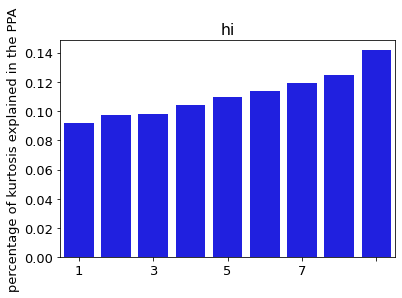

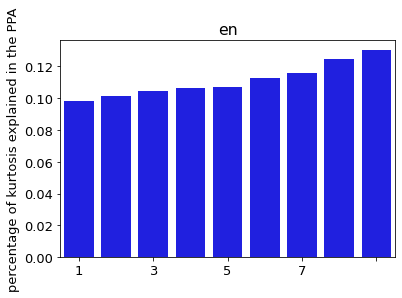

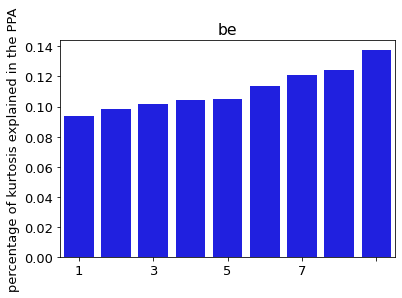

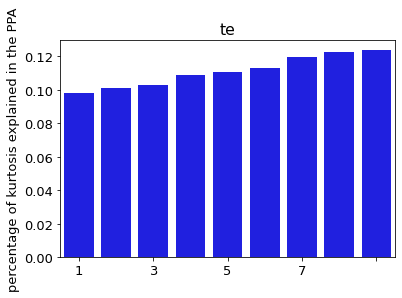

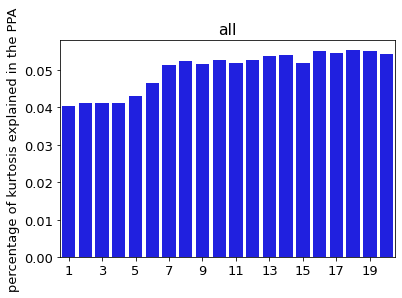

In [0]:
def top_k_PPA_v2(axes,k):
    X = np.random.rand(len(axes), len(axes[0]))
    X/=1000000000
    for i in range(len(axes)):
        for j in range(len(axes[i])):
            X[i][j]+=axes[i][j]
    X=X.T
    T, V, PPOUT = projpursuit(X, p=len(axes)-1)
    T=T.T
    PPs = []
    for i in range(len(axes)-1):
        PPs.append([T[i],var(T[i],axes)])
    # PPs = sorted(PPs, key = lambda x: x[1],reverse=True)
    for i in range(len(PPs)):
        PPs[i]= PPs[i][0]
    return [PPs[:k], PPOUT['K']]


def plot_explained_kurtosis(axes, title):
        axes = [i/np.linalg.norm(i) for i in axes]
        principalComponents, y = top_k_PPA_v2(axes,k=len(axes))
        y = y[:20]
        y/=sum(y)
        ax = sns.barplot(x= [i for i in range(0, len(y))], y=y, color='blue')
        ax.set_title(title)
        ax.set_xticks(np.arange(0,len(y), 2))
        ax.set_xticklabels(np.arange(1,len(y),2))
        ax.set(ylabel='percentage of kurtosis explained in the PPA')
        plt.show()        

for i, j in zip([axis_hi, axis_en, axis_be, axis_te, axis_all], ['hi', 'en', 'be', 'te', 'all']):
    plot_explained_kurtosis(i, j)

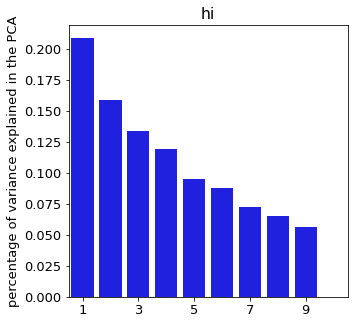

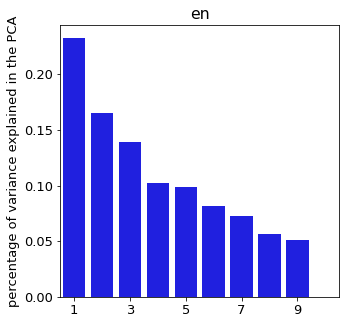

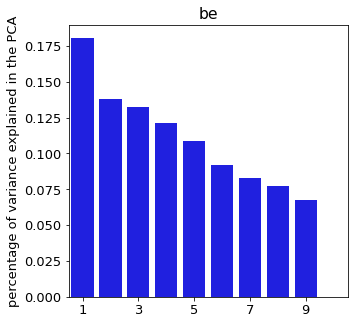

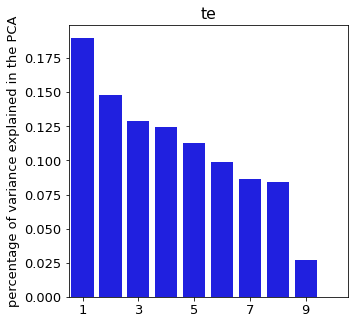

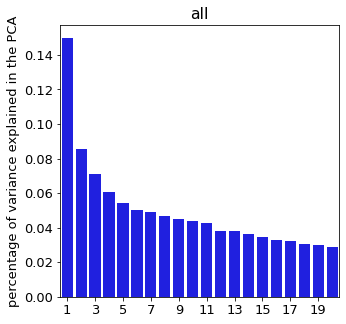

In [0]:
def plot_explained_variance(axes, title, use_PCA=True):
    axes = [i/np.linalg.norm(i) for i in axes]
    if use_PCA:
        pca = PCA(n_components=len(axes))
        principalComponents = pca.fit_transform(axes)
        plt.figure(figsize=(5,5))
        y = np.array(pca.explained_variance_ratio_)
    
    else:
        principalComponents = top_k_PPA(axes,k=len(axes))
        U, S, V = np.linalg.svd(principalComponents, full_matrices=False)

        m4 = S**4/(len(axes))
        m2 = sum(S**2/len(axes))**2
        explained_kurtosis_ = m2/m4 -3
        total_kurt = explained_kurtosis_.sum()
        
        explained_variance_ = (S ** 2) / (len(axes) - 1)
        total_var = explained_variance_.sum()
        
        #y = explained_variance_ / total_var
        y = explained_kurtosis_ / total_kurt
        
    y = y[:20]
    y/=sum(y)
    ax = sns.barplot(x= [i for i in range(0, len(y))], y=y, color='blue')
    ax.set_title(title)
    ax.set_xticks(np.arange(0,len(y), 2))
    ax.set_xticklabels(np.arange(1,len(y),2))
    if use_PCA:
        ax.set(ylabel='percentage of variance explained in the PCA')
    else:
        ax.set(ylabel='percentage of variance explained in the PPA')
    plt.show()
    
#for i, t in zip([axis_man_is_to], ['man_is_to_']):    
for i, t in zip([axis_hi, axis_en, axis_be, axis_te, axis_all], ['hi', 'en', 'be', 'te', 'all']):
    plot_explained_variance(i, t, use_PCA=True)

## ALPHA, BETA PLOT

In [0]:
NE_sub = ['fair', 'good', 'light', 'nervous', 'rich', 'professor', 'administrator', 'ambassador', 'architect', 'artist']
NH_sub = ['गंभीर', 'महत्वाकांक्षी', 'आक्रामक', 'वास्तुकार', 'राजगीर', 'दर्जी', 'माली', 'जज', 'लेफ्टिनेंट', 'प्रिंसिपल']
NT_sub = ['సీరియస్', 'ప్రతిష్టాత్మక', 'దూకుడు', 'యదార్థ', 'నియంత్రించు','న్యాయమూర్తి', 'న్యాయవాది', 'నిర్వాహకుడు', 'రాయబారి', 'కళాకారుడు'] 
NB_sub = ['স্বচ্ছ', 'অ্যাডমিন', 'কম', 'আশাবাদী', 'পরিষ্কৃত', 'সচিব', 'নির্দেশক', 'গীতিকার', 'সেনাপতি', 'সেনাধ্যক্ষ']

def find_alpha_beta(vector, g_axis):    
    # Expects normalized vector and axis
    alpha = np.dot(vector,g_axis)/(np.linalg.norm(vector)*np.linalg.norm(g_axis))
    beta = vector - (np.dot(vector, g_axis)/np.dot(g_axis, g_axis))*g_axis
    return alpha, np.linalg.norm(beta)

def label_point(x, y,val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+0.001, point['y'], str(point['val']), fontproperties=hindi_font)

def label_point_color(x, y,val, ax, hue):
    hue_to_color = {'hi':'r', 'en':'y', 'bn':'b', 'te':'g'}
    hue = [hue_to_color[i] for i in hue]
    a = pd.concat({'x': x, 'y': y, 'val': val, 'color':pd.Series(hue)}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+0.001, point['y'], str(point['val']), fontproperties=hindi_font, fontsize=20, color=point['color'])
        
        
def plot_alpha_beta(emb, neutral_words, gender_axis, title):
    alpha_beta = []
    labels = []
    gender_axis = gender_axis/np.linalg.norm(gender_axis)
    for i in neutral_words:
        labels.append(i)
        alpha_beta.append(find_alpha_beta(emb[i]/np.linalg.norm(emb[i]), gender_axis))
    alpha_beta = np.array(alpha_beta)
    with sns.color_palette("husl", 2):
        plt.figure(figsize=(15,5))
        ax = sns.scatterplot(alpha_beta[:,0], alpha_beta[:,1])    
        ax.set(xlabel='alpha', ylabel='beta')
        ax.set_title(title)
        label_point(pd.Series(alpha_beta[:,0]), pd.Series(alpha_beta[:,1]), pd.Series(labels), ax)  
        #plt.show()
        
def plot_alpha_beta_all(emb, neutral_set, gender_axis):
    
    alpha_beta = []
    labels = []
    hue = []
    
    count = 0
    for neutral_l, axis_l, emb_l in zip(neutral_set, gender_axis, emb):
        axis_l = axis_l/np.linalg.norm(axis_l)
        for i in neutral_l:
            labels.append(i)
            alpha_beta.append(find_alpha_beta(emb_l[i]/np.linalg.norm(emb_l[i]), axis_l))
            hue.append(count)
        count+=1
    
    hue_to_lang = {0:'hi', 1:'en', 2:'bn', 3:'te'}
    hue_to_color = {'hi':'r', 'en':'y', 'bn':'b', 'te':'g'}
    hue = [hue_to_lang[i] for i in hue]
    
    alpha_beta = np.array(alpha_beta)
    labels = np.array(labels)
    hue = np.array(hue)
    show_text = True
    
    indices_to_keep = np.where(abs(np.logical_and(alpha_beta[:,0]>-0.1, alpha_beta[:,0]<0.05)))
    alpha_beta = alpha_beta[indices_to_keep]
    labels = labels[indices_to_keep]
    hue = hue[indices_to_keep]
    print(hue)
    for i in hue_to_color:
        print(i, sum(hue==i))
    
    if show_text==True:
        plt.figure(figsize=(15,8))
        plt.rcParams.update({'font.size': 10})
        
        alpha = alpha_beta[:,0]
        
        #beta = alpha_beta[:,1]
        beta = np.random.uniform(low=-1, high=1, size=(len(alpha,)))
        
        ax = sns.scatterplot(alpha, beta, color='w')    
        ax.set(xlabel='angle between word vector and gender axis')#, ylabel='length of orthogonal projection of word vector from gender axis ')
        ax.set_title('alpha beta plot')
        ax.axes.get_yaxis().set_visible(False)
        
        rng_state = np.random.get_state()
        np.random.set_state(rng_state)
        
        label_point_color(pd.Series(alpha), pd.Series(beta), pd.Series(labels), ax, hue)  
        #label_point_color(pd.Series(alpha_beta[:,0]), pd.Series(alpha_beta[:,1][::-1]), pd.Series(labels), ax, hue[::-1])  
        #label_point_color(pd.Series(alpha_beta[:,0]), pd.Series(np.random.shuffle(alpha_beta[:,1])), pd.Series(np.random.shuffle(labels)), ax, np.random.shuffle(hue))  

        
    else:
        with sns.color_palette("husl", 4):
            plt.figure(figsize=(15,10))
            ax = sns.scatterplot(alpha_beta[:,0], np.random.uniform(low=-1, high=1, size=(len(alpha_beta,))), hue=hue, sizes=[250 for i in hue])    
            ax.set(xlabel='angle between word vector and gender axis', ylabel='length of orthogonal projection of word vector from gender axis ')
            ax.set_title('alpha beta plot')

['hi' 'hi' 'hi' 'hi' 'hi' 'hi' 'hi' 'hi' 'hi' 'hi' 'en' 'en' 'en' 'en'
 'en' 'en' 'en' 'en' 'en' 'en' 'bn' 'bn' 'bn' 'bn' 'bn' 'bn' 'bn' 'bn'
 'bn' 'bn' 'te' 'te' 'te' 'te' 'te' 'te' 'te' 'te' 'te' 'te']
hi 10
en 10
bn 10
te 10


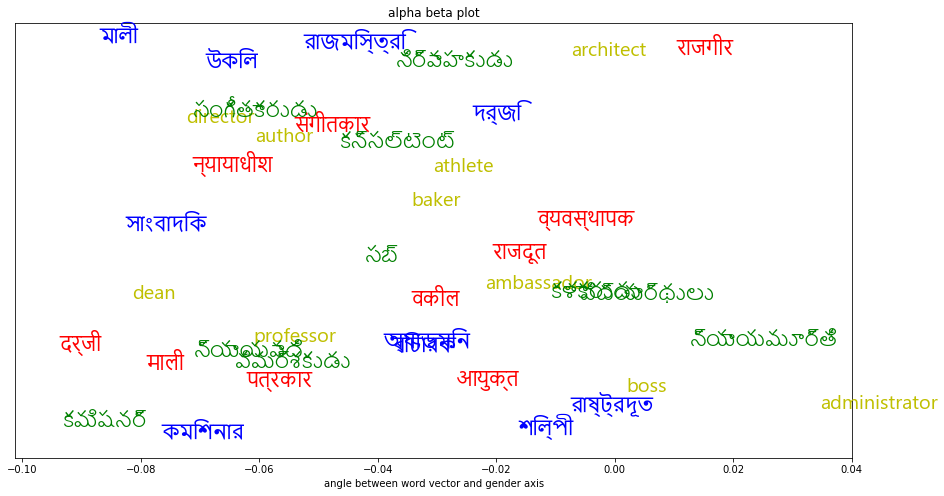

In [0]:
K = 8

EMBEDDINGS_ORIG = ['Orig', 'Orig', 'Orig', 'Orig']
EMBEDDINGS_HD = ['hi_HD', 'en_HD', 'bn_HD', 'te_HD']
EMBEDDINGS_PCA_eight = ['g_hi_PCA', 'g_en_PCA', 'g_bn_PCA', 'g_te_PCA']

NT_list = [NH[:12], NE[:11], NB[:10], NT[:11]]
GENDER_AXIS_list_one = [np.mean(top_k(axis_hi, K), axis=0), np.mean(top_k(axis_en, K), axis=0), np.mean(top_k(axis_be, K), axis=0), np.mean(top_k(axis_te, K), axis=0)]
EMBS = [debiased_embeddings[i] for i in EMBEDDINGS_ORIG]

plot_alpha_beta_all(EMBS, NT_list, GENDER_AXIS_list_one)

In [0]:
axis_man_is_to = []
for pair in [["woman", "man"], ["girl", "boy"], ["she", "he"], ["mother", "father"], ["daughter", "son"], ["gal", "guy"], ["female", "male"], ["her", "his"], ["herself", "himself"], ["Mary", "John"]]:
    if pair[0] in debiased_embeddings['Orig']:
        if pair[1] in debiased_embeddings['Orig']:
            v = (debiased_embeddings['Orig'][pair[0]]-debiased_embeddings['Orig'][pair[1]])
            v/=np.linalg.norm(v)
            axis_man_is_to.append(v)
axis_man_is_to = np.array(axis_man_is_to)            

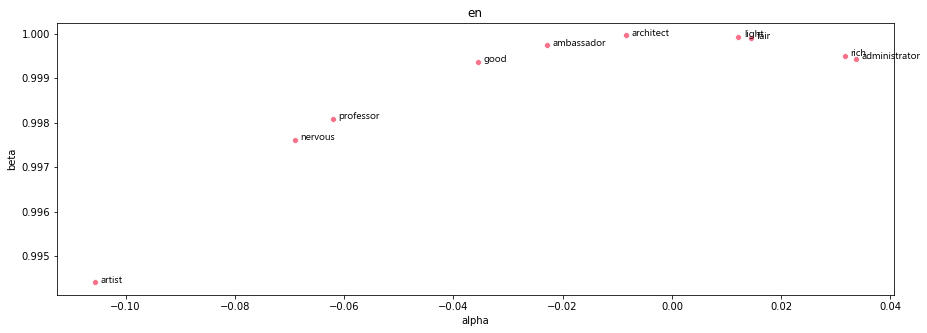

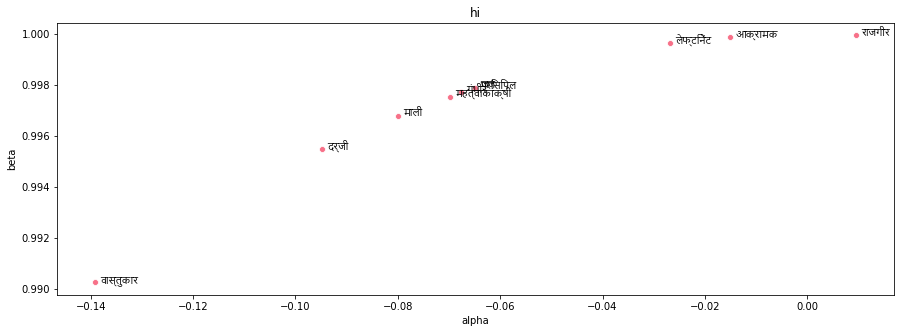

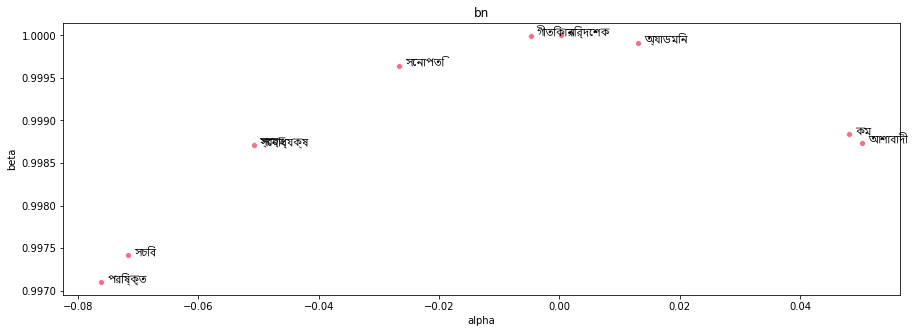

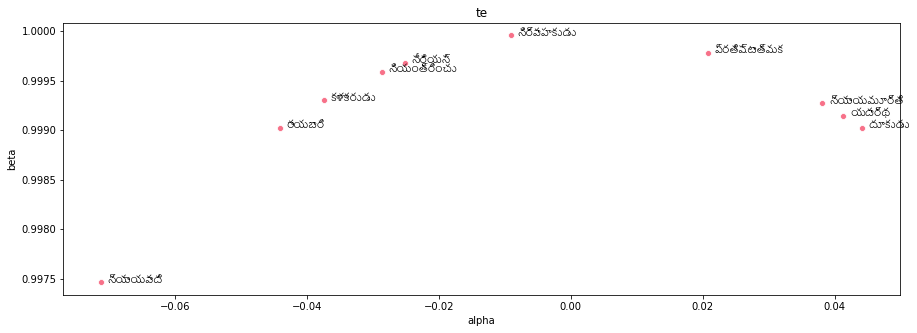

In [0]:
K = 8

EMBEDDINGS_ORIG = ['Orig', 'Orig', 'Orig', 'Orig']
EMBEDDINGS_HD = ['hi_HD', 'en_HD', 'bn_HD', 'te_HD']
EMBEDDINGS_PCA_eight = ['g_hi_PCA', 'g_en_PCA', 'g_bn_PCA', 'g_te_PCA']
EMBEDDING_ORIG_ALL = ['Orig']
EMBEDDING_HD_ALL = ['all_HD']
EMBEDDING_PCA_eight_ALL = ['all_PCA']

params_one = [[NE_sub, axis_en[0], 'en'], [NH_sub, axis_hi[0], 'hi'], [NB_sub, axis_be[0], 'bn'], [NT_sub, axis_te[0], 'te']]
params_top_K = [[NE_sub, np.mean(top_k(axis_en, K), axis=0), 'en'], [NH_sub, np.mean(top_k(axis_hi, K), axis=0), 'hi'], [NB_sub, np.mean(top_k(axis_be, K), axis=0), 'bn'], [NT_sub, np.mean(top_k(axis_te, K), axis=0), 'te']]

params_one_all = [[NE_sub+NH_sub+NB_sub+NT_sub,   axis_all[0], 'all']]
params_top_K_all = [[NE_sub+NH_sub+NB_sub+NT_sub, np.mean(top_k(axis_all, K), axis=0), 'all']]

plots = []
for emb, para in zip(EMBEDDINGS_PCA_eight, params_top_K):
    plots.append(plot_alpha_beta(debiased_embeddings[emb], *para))

AttributeError: 'AxesSubplot' object has no attribute 'show'

In [0]:
def plot_tsne(emb_one_name, emb_two_name, emb_N, g_axis, limit, using, rs):
    emb_one = debiased_embeddings[emb_one_name]
    emb_two = debiased_embeddings[emb_two_name]
    emb_one_data = [emb_one[i] for  i in emb_N[:limit]]
    emb_two_data = [emb_two[i] for  i in emb_N[:limit]]
    
    
    if using=='sns':
        tsne_one = TSNE(n_components=2, verbose=0, n_iter=3000, random_state=42)
        tsne_results_one = tsne_one.fit_transform(emb_one_data)
        
        tsne_two = TSNE(n_components=2, verbose=0, n_iter=3000, random_state=52)
        tsne_results_two = tsne_two.fit_transform(emb_two_data)

        x = np.hstack([tsne_results_one[:,0], tsne_results_two[:,0]])
        y = np.hstack([tsne_results_one[:,1], tsne_results_two[:,1]])
        
        h = [str(emb_one_name)]*len(emb_one_data) + [str(emb_two_name)]*len(emb_two_data)    
    
        with sns.color_palette("husl", 2):
            #plt.figure(figsize=(16,10))
            sns.scatterplot(x, y, hue=h)    
            
        plt.figure()

    elif using=='plotly':
        tsne_one = TSNE(n_components=2, verbose=0, n_iter=3000, random_state=42)
        tsne_results_one = tsne_one.fit_transform(emb_one_data)

        tsne_two = TSNE(n_components=2, verbose=0, n_iter=3000, random_state=52)
        tsne_results_two = tsne_two.fit_transform(emb_two_data)
    
        x = np.hstack([tsne_results_one[:,0], tsne_results_two[:,0]])
        y = np.hstack([tsne_results_one[:,1], tsne_results_two[:,1]])
        z = np.hstack([tsne_results_one[:,2], tsne_results_two[:,2]])
        
        h = [0]*len(emb_one_data) + [1]*len(emb_two_data)    
    
        # Configure the trace.
        trace = go.Scatter3d(
            x=x,  # <-- Put your data instead
            y=y,  # <-- Put your data instead
            z=z,  # <-- Put your data instead
            mode='markers',
            marker={
                'size': 10,
                'opacity': 0.8,
                'color':h
            }
        )        

        # Configure the layout.
        layout = go.Layout(
            margin={'l': 0, 'r': 0, 'b': 0, 't': 0}
        )

        data = [trace]

        plot_figure = go.Figure(data=data, layout=layout)

        # Render the plot.
        plotly.offline.iplot(plot_figure)        
    
    elif using=='matplotlib':
        tsne_one = TSNE(n_components=2, verbose=0, n_iter=3000, random_state=42+rs)
        tsne_results_one = tsne_one.fit_transform(emb_one_data)
        del(tsne_one)
        
        tsne_two = TSNE(n_components=2, verbose=0, n_iter=3000, random_state=52+rs)
        tsne_results_two = tsne_two.fit_transform(emb_two_data)
        del(tsne_two)
        
        x = np.hstack([tsne_results_one[:,0], tsne_results_two[:,0]])
        y = np.hstack([tsne_results_one[:,1], tsne_results_two[:,1]])

        c = ['r']*len(emb_one_data) + ['b']*len(emb_two_data)    
        
        plt.scatter(x, y, c=c)

        plt.show()

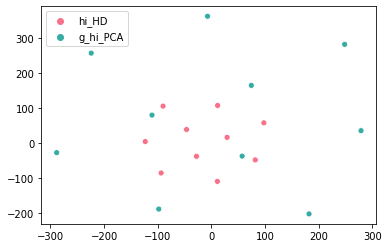

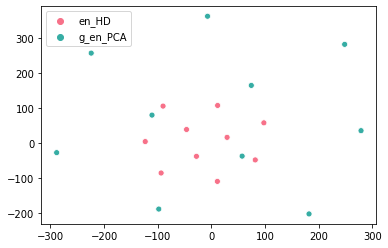

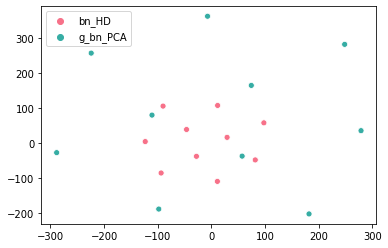

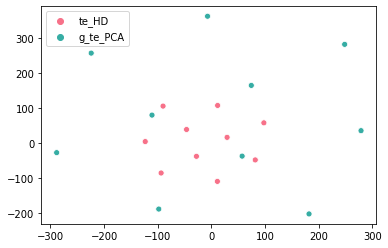

<Figure size 432x288 with 0 Axes>

In [0]:
gendered_words = [['hi_HD', 'g_hi_PCA', hi_pairs_test, axis_hi], ['en_HD', 'g_en_PCA', en_pairs_test, axis_en], ['bn_HD', 'g_bn_PCA', be_pairs_test, axis_be], ['te_HD', 'g_te_PCA', te_pairs_test, axis_te]]
for t, i in enumerate(gendered_words):
    plot_tsne(i[0], i[1], np.array(i[2]).ravel(), i[3], 10, 'sns', t)

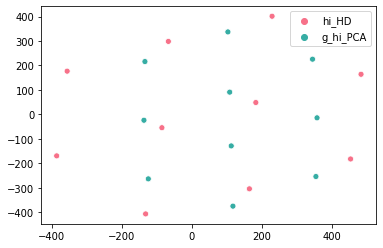

<Figure size 432x288 with 0 Axes>

In [0]:
gendered_words = [['hi_HD', 'g_hi_PCA', hi_pairs_test, axis_hi], ['en_HD', 'g_en_PCA', en_pairs_test, axis_en], ['bn_HD', 'g_bn_PCA', be_pairs_test, axis_be], ['te_HD', 'g_te_PCA', te_pairs_test, axis_te]]
neutral_words =  [['hi_HD', 'g_hi_PCA', NH,            axis_hi], ['en_HD', 'g_en_PCA', NE, axis_en,   axis_en], ['bn_HD', 'g_bn_PCA', NB,            axis_be], ['te_HD', 'g_te_PCA', NT,            axis_te]]
for i in neutral_words:
    #plot_tsne(i[0], i[1], np.array(i[2]).ravel(), i[3], 10, 'matplotlib')
    plot_tsne(i[0], i[1], np.array(i[2]).ravel(), i[3], 10, 'sns')
    
    #plot_tsne(i[0], i[1], np.array(i[2]).ravel(), 10, 'plotly')
    break

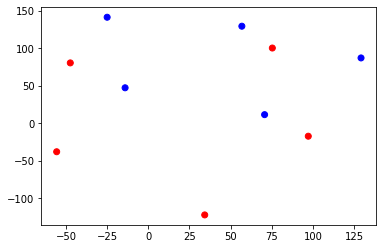

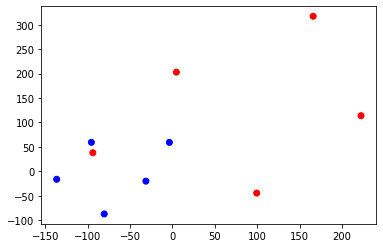

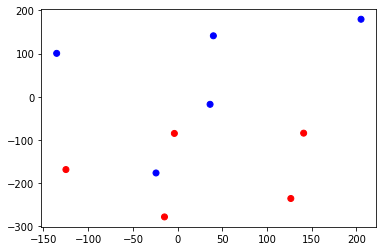

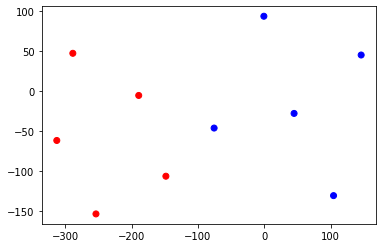

In [0]:
gendered_words = [['hi_HD', 'g_hi_PCA', hi_pairs_test, axis_hi], ['en_HD', 'g_en_PCA', en_pairs_test, axis_en], ['bn_HD', 'g_bn_PCA', be_pairs_test, axis_be], ['te_HD', 'g_te_PCA', te_pairs_test, axis_te]]
neutral_words =  [['hi_HD', 'g_hi_PCA', NH,            axis_hi], ['en_HD', 'g_en_PCA', NE, axis_en,   axis_en], ['bn_HD', 'g_bn_PCA', NB,            axis_be], ['te_HD', 'g_te_PCA', NT,            axis_te]]
for i in neutral_words:
    plot_tsne(i[0], i[1], np.array(i[2]).ravel(), i[3], 5, 'matplotlib')
    #plot_tsne(i[0], i[1], np.array(i[2]).ravel(), 10, 'sns')
    #plot_tsne(i[0], i[1], np.array(i[2]).ravel(), 10, 'plotly')

In [0]:
axis_en

[array([-0.06090016,  0.03453837,  0.03508121,  0.09744026,  0.12610914,
         0.04369884,  0.0658536 ,  0.02330831, -0.00573378,  0.04308814,
         0.00447845, -0.07559085, -0.00050892, -0.01380856,  0.01696383,
        -0.14385331, -0.04156139,  0.00251065,  0.1375767 ,  0.00831228,
         0.00505522, -0.08722804, -0.03487764,  0.04305421,  0.04162925,
         0.00488558,  0.00386775, -0.03820255,  0.03609904, -0.12549845,
         0.03939002,  0.05099329, -0.0117729 , -0.03080632, -0.01750668,
         0.04244351, -0.0359294 ,  0.05933949, -0.0588645 ,  0.03620082,
        -0.02341009, -0.10171515,  0.00783729,  0.07939074, -0.01204432,
         0.03375803,  0.06117159, -0.06442864,  0.11447195, -0.09547246,
         0.00726052, -0.09927236,  0.04027214,  0.08929762,  0.10799177,
         0.05367357,  0.07301234, -0.067075  , -0.01319786, -0.04190067,
         0.00244279, -0.01906735,  0.03637046,  0.11535407,  0.05648957,
        -0.00871941,  0.05536995,  0.07922111,  0.0

In [0]:
    plot_tsne('hi_HD', 'g_hi_PCA', np.array(hi_pairs_test).ravel(), 'sns')
    plot_tsne('en_HD', 'g_en_PCA', np.array(en_pairs_test).ravel(), 'sns')
    plot_tsne('bn_HD', 'g_bn_PCA', np.array(be_pairs_test).ravel(), 'sns')
    plot_tsne('te_HD', 'g_te_PCA', np.array(te_pairs_test).ravel(), 'sns')

In [0]:
V[:,0]

array([ 1, -2,  4])

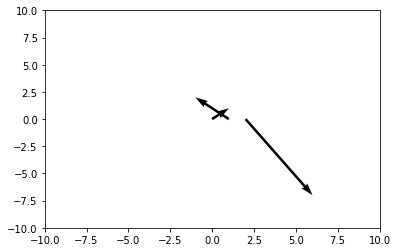

In [0]:
import numpy as np
import matplotlib.pyplot as plt

V = np.array([[1,1],[-2,2],[4,-7]])
origin = [0], [0] # origin point

plt.quiver([1, -2, 4], [1, 2, -7], angles='xy', scale_units='xy', scale=1)
plt.xlim(-200, 200)
plt.ylim(-200, 200)
plt.show()

# plt.quiver(*origin, V[:,0], V[:,1], color=['r','b','g'], scale=21)
# plt.show()

In [0]:
x

NameError: name 'x' is not defined

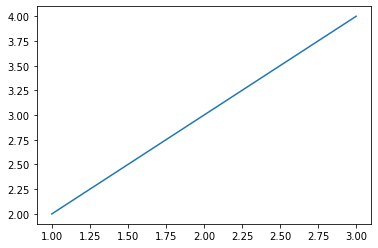

In [0]:
point1 = [1, 2]
point2 = [3, 4]

x_values = [point1[0], point2[0]]

y_values = [point1[1], point2[1]]

plt.plot(x_values, y_values)

In [0]:
Professor, Boss,Poet,माली,पत्रकार,न्यायाधीश,वकील ,মালী,সাংবাদিক,বিচারক,উকিল,'న్యాయమూర్తి', 'న్యాయవాది', 'నిర్వాహకుడు', 'రాయ